## K-Nearest Neighbors

Based on code example of "An Introduction to Machine Learning with Python" by A.C. Muller and S. Guido (O'Reilly). Adapted by M. Eirinaki.

Note: For this tutorial you will need to use the authors' helper functions included in the helper library mglearn. You will also need the helper function preamble.py. Download both from: https://github.com/amueller/introduction_to_ml_with_python  


In [1]:
%matplotlib inline

from preamble import * #helper library, includes calls to the various libraries we'll use plus some additional functionality
from sklearn.model_selection import train_test_split 


### Example 1: Visualizing the K-NN classification algorithm 

In this example we create a small dataset of two-dimensional instances, belonging to two classes. We demonstrate how new, unseen instances, get classified and how the prediction might change when different number of neighbors (K) is used.

X.shape: (26, 2)


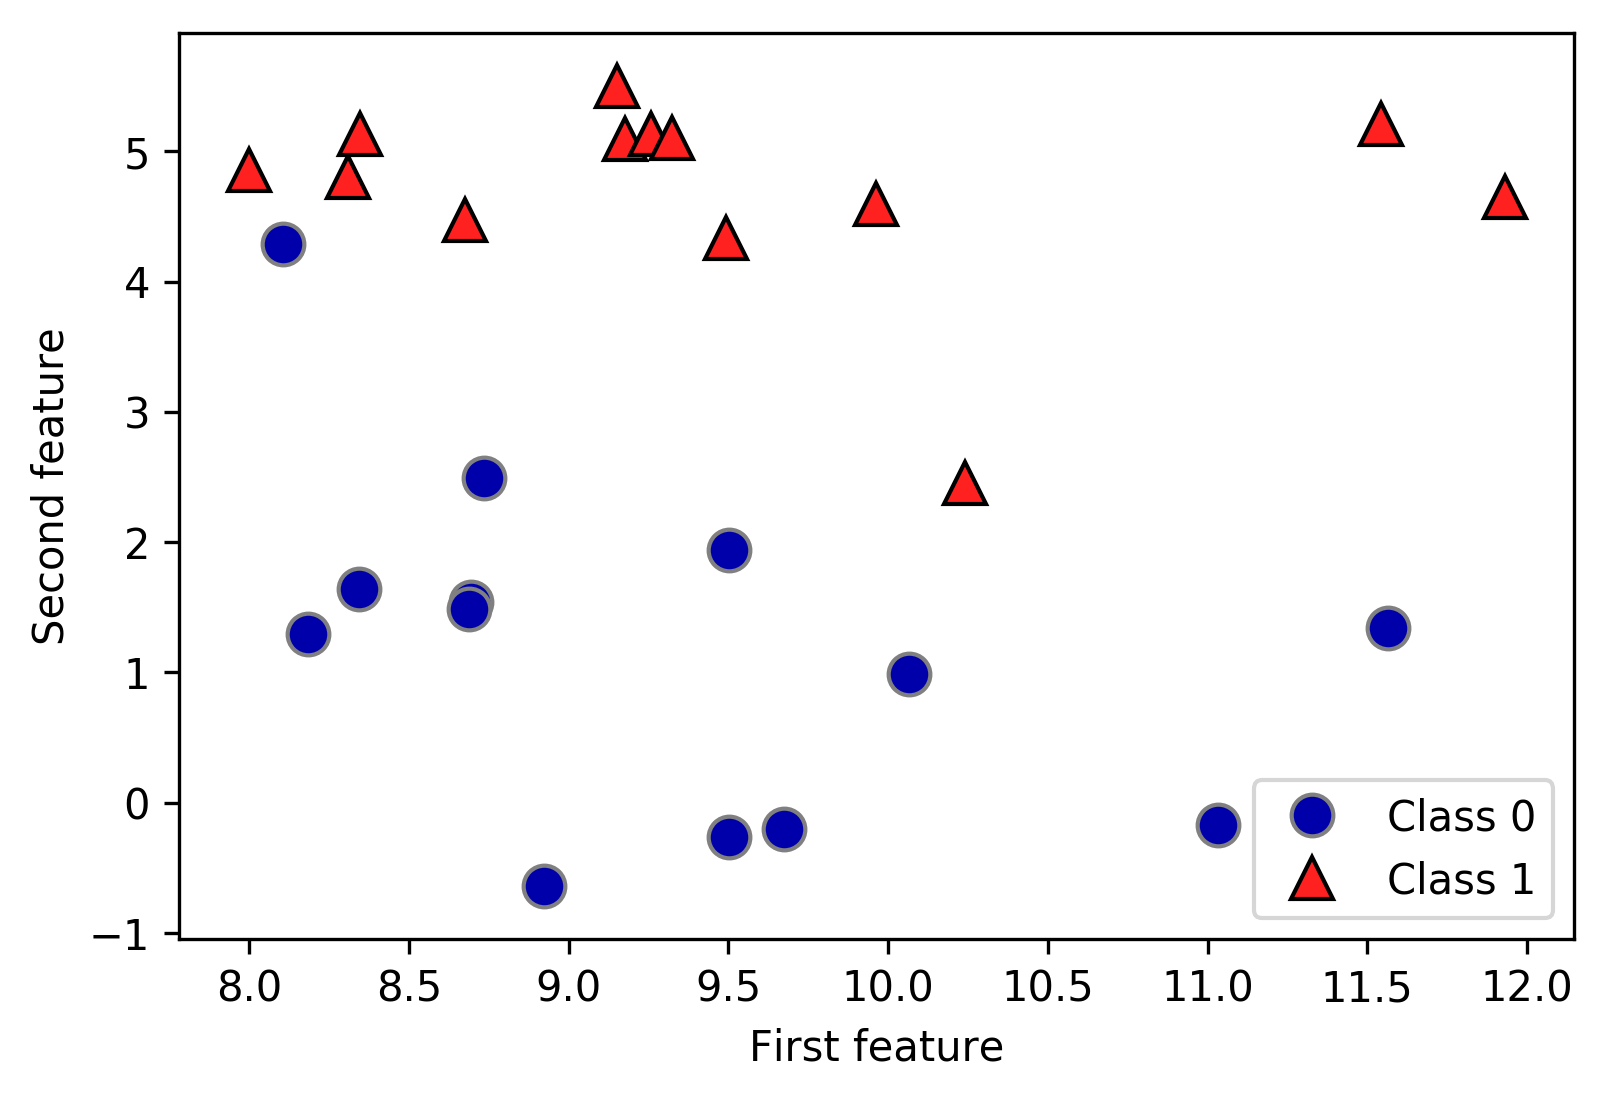

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge() #creates a synthetic dataset using author-provided helper library mglearn
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

For this visualization tutorial we use a helper function, plot_knn_classification. The function takes as input the number of neighbors, runs the K-NN classifier, and plots the results. We demonstrate how the three "unseen" instances are classified when K=1 and K=3.

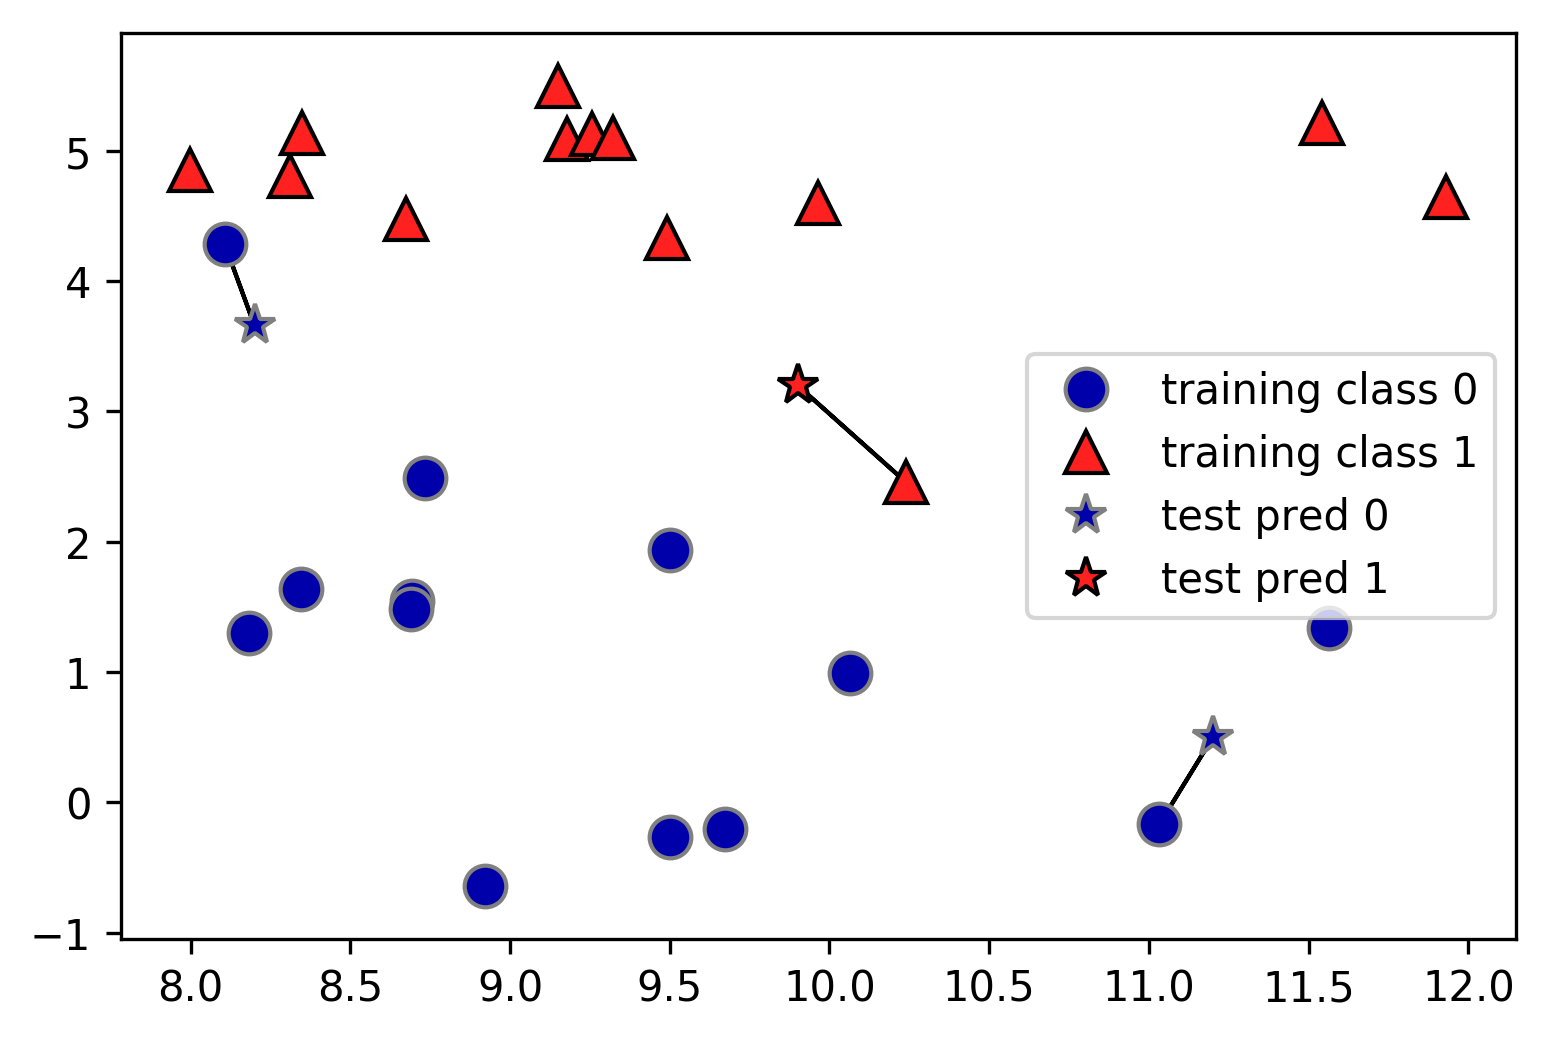

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

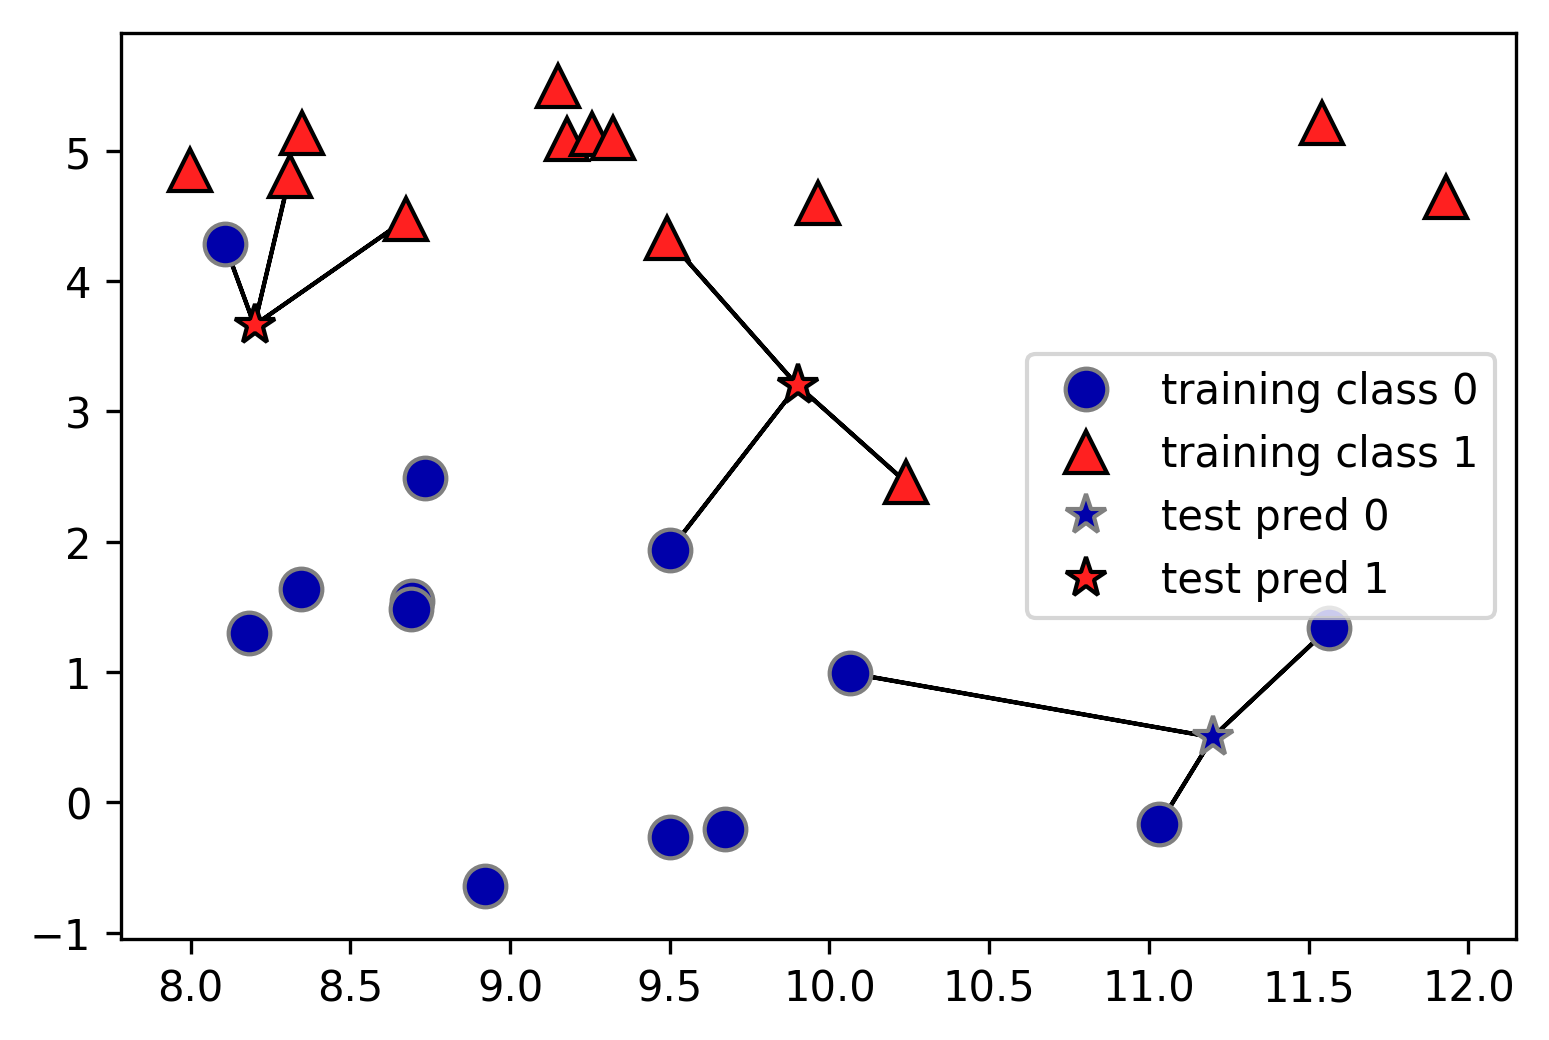

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### Analyzing KNeighborsClassifier

In this step you can explore, side-by-side how the decision boundaries of the classifier changes depending on the number of neighbors. 

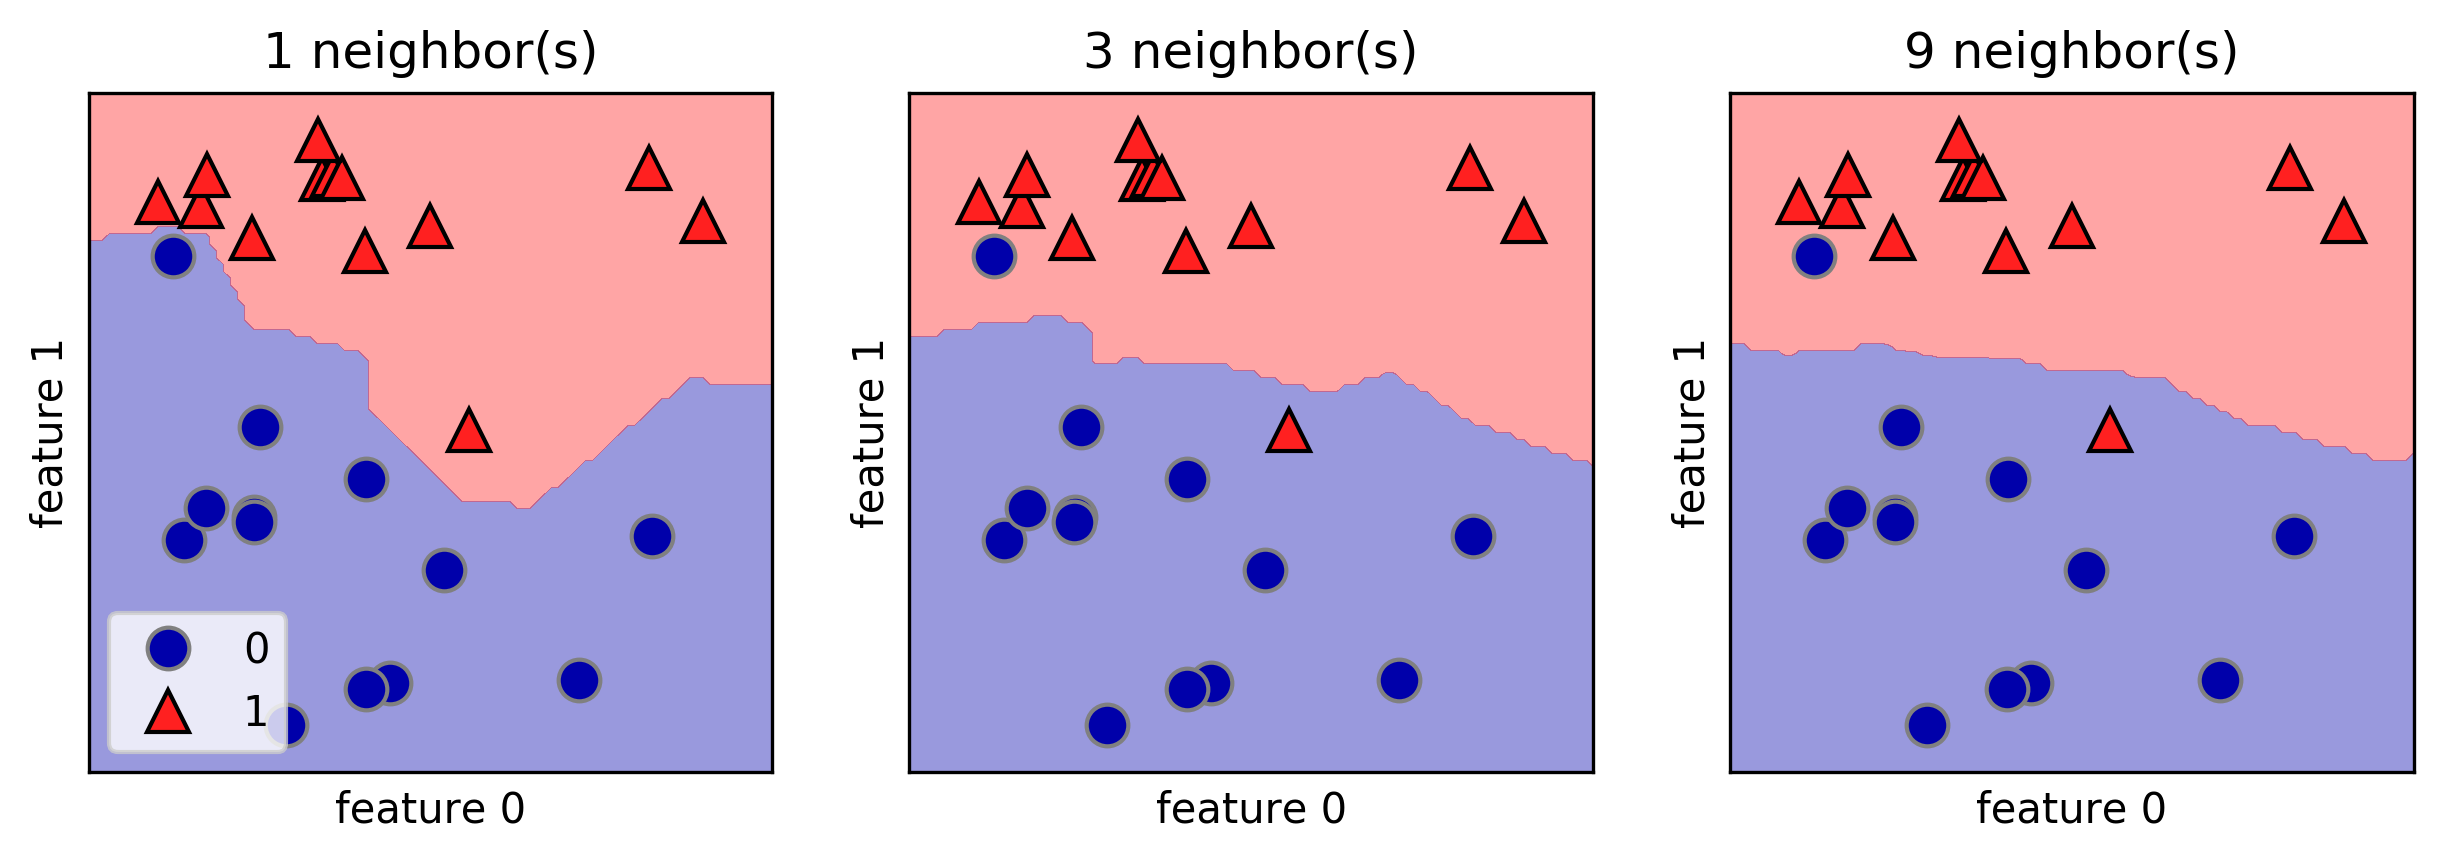

In [5]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

### Example 2: Analyzing K-NN / Finding optimal K

In this example we will use the cancer dataset. We build multiple classifiers using different values for K and evaluate the accuracy of the models for both the training and the test set. We also plot the results for easier analysis.

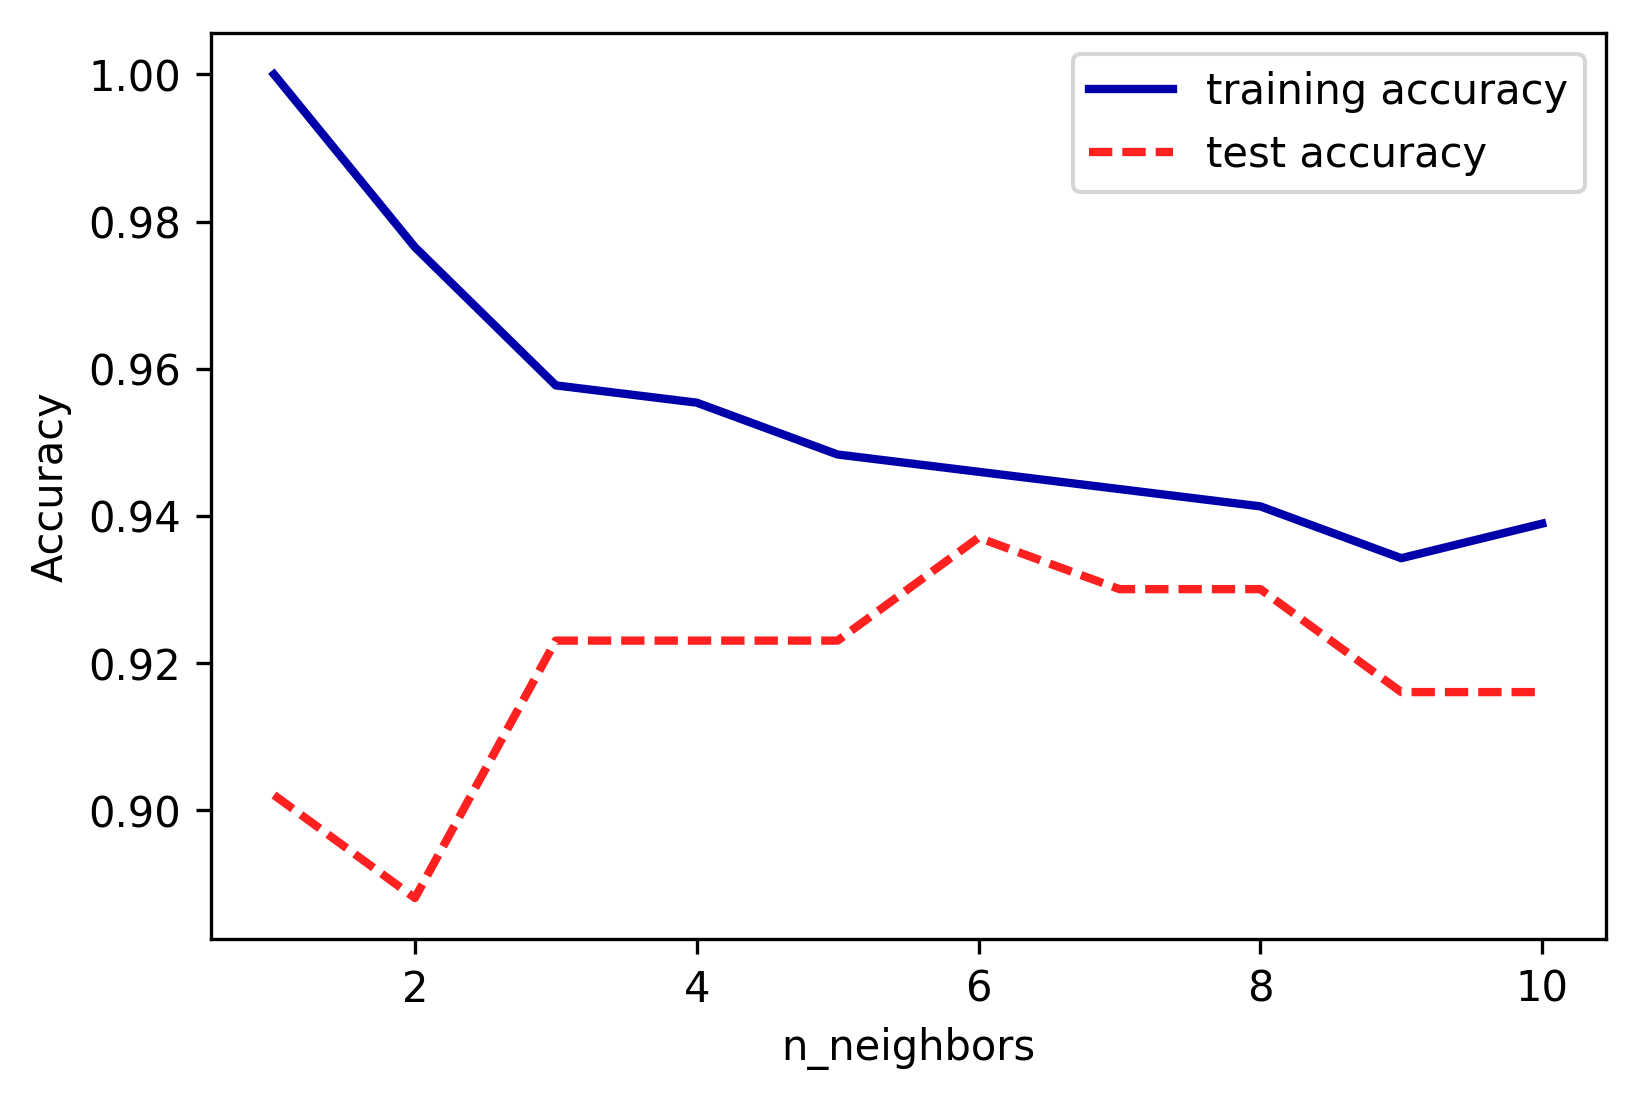

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()

#Split into training and test. 
#Remember that we use random_state to always end up with the same "random" split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66) 


training_accuracy = []
test_accuracy = []


# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
#plot the results    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Example 3:  K-Nearest Neighbors Regression

Finally, let's not forget that K-NN can be used for regression. The following examples shows how the model can underfit/overfit the training data depending on the number of neighbors used.

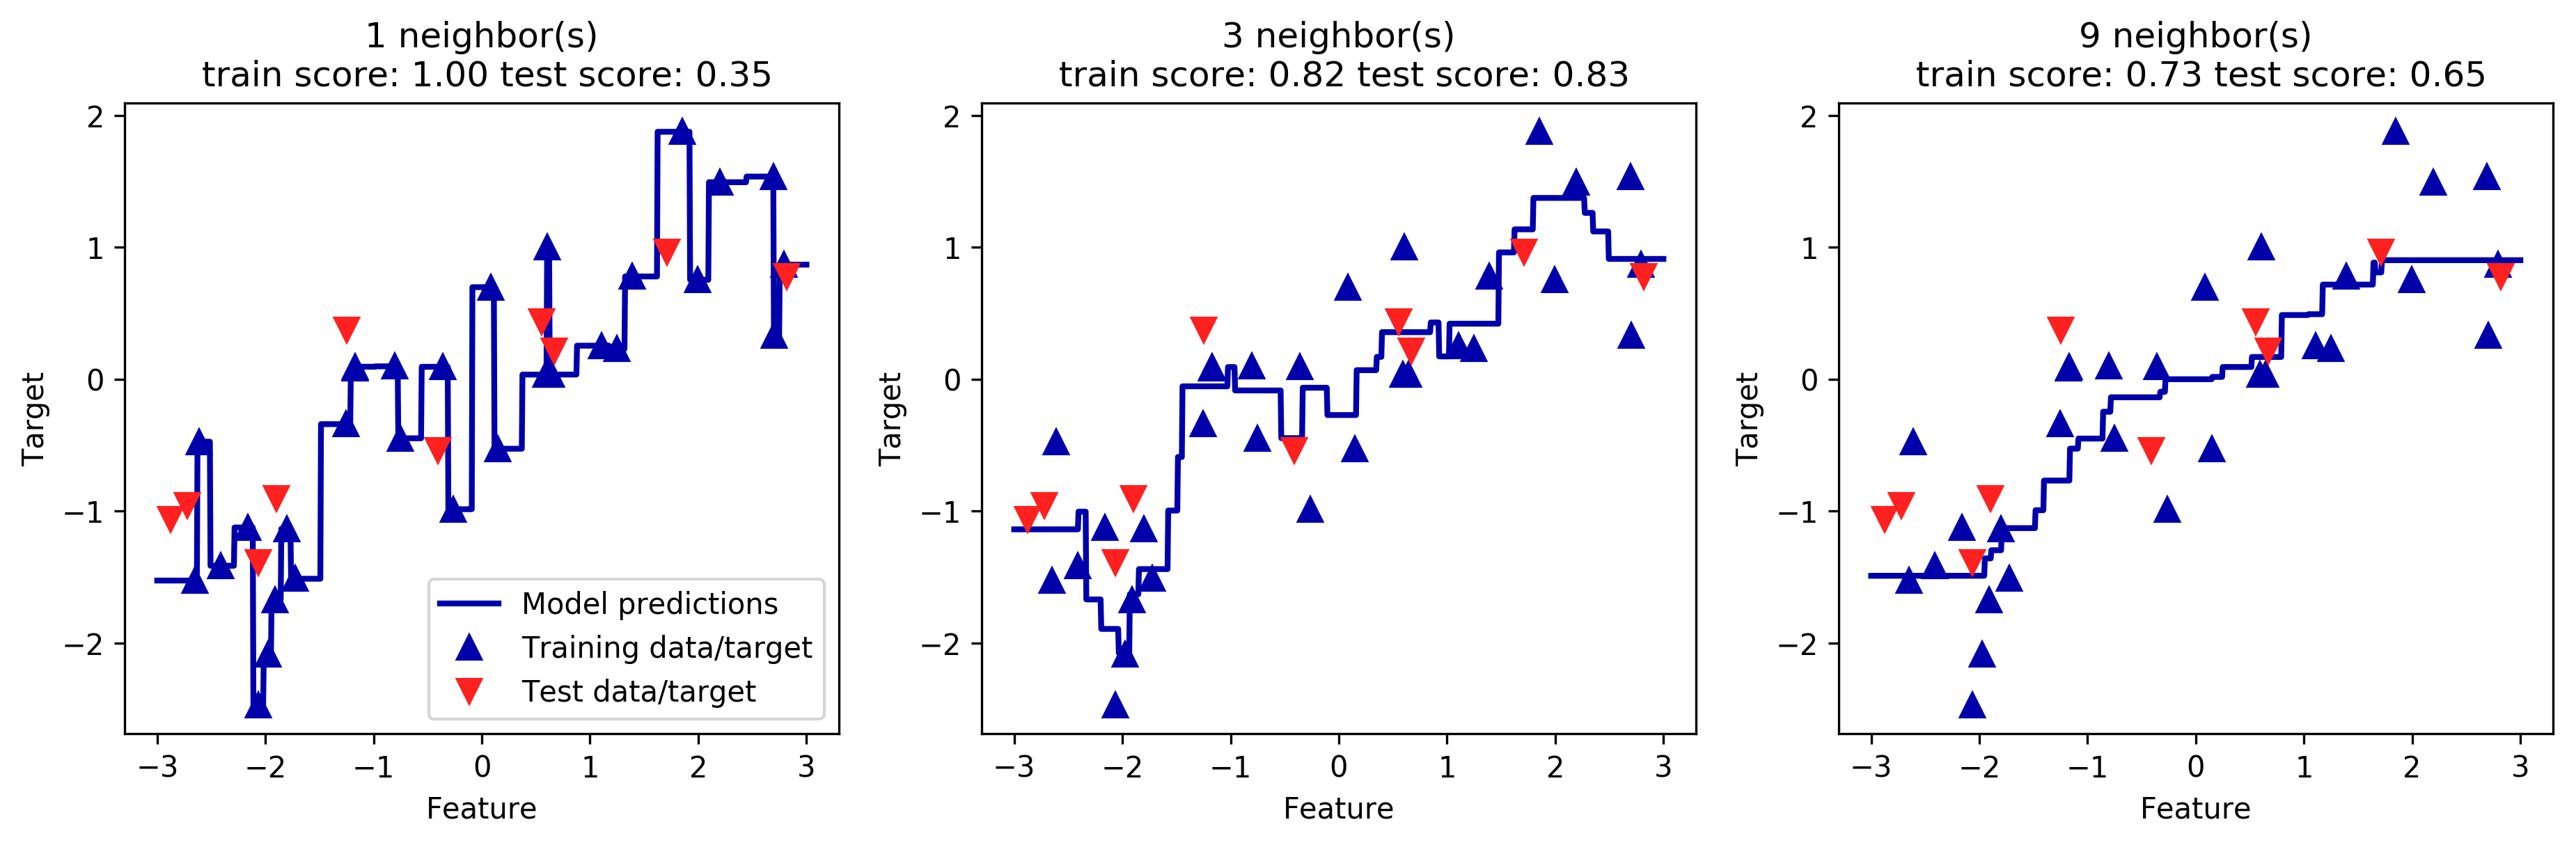

In [7]:
from sklearn.neighbors import KNeighborsRegressor

#generate the dataset
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")